In [4]:
#Import necessary libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
df = pd.read_csv("/exams.csv")

# Display the first few rows to check if it loaded correctly
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [6]:
df.shape

(1000, 8)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Null values per column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Number of duplicate rows:
0


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to a categorical column (replace 'your_categorical_column' with your column name)
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
# Display the updated DataFrame with the new encoded column
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,0,59,70,78
1,male,group D,associate's degree,standard,1,96,93,87
2,female,group D,some college,free/reduced,1,57,76,77
3,male,group B,some college,free/reduced,1,70,70,63
4,female,group D,associate's degree,standard,1,83,85,86


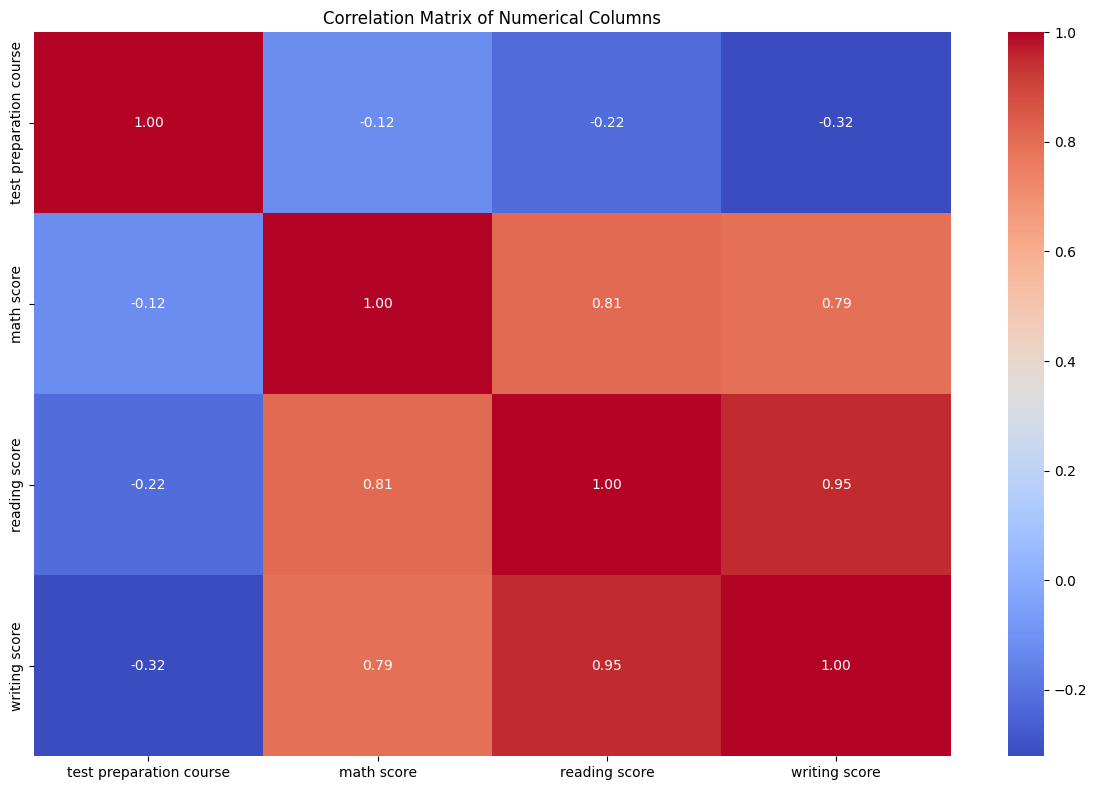

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
plt.show()

In [12]:
# Define features (X) and target (y)
X = df.drop('math score', axis=1)
y = df['math score']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=numpy.number).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 14) (200, 14) (800,) (200,)


In [13]:
#Initialize and train the model:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
#Display model parameters:
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_}")

Intercept: 57.39665244021307, Coefficient: [ 1.82571740e+00  3.86165303e+00  1.02993658e+01  1.28658792e+01
  3.58855878e-01  3.39293810e-01  7.39626401e-02  4.76304137e+00
 -6.45653370e-01 -5.10784666e-02 -5.73941308e-01 -1.12882551e-02
 -6.35683230e-01  4.51912251e+00]


In [15]:
#Make predictions:
y_pred = model.predict(X_test)

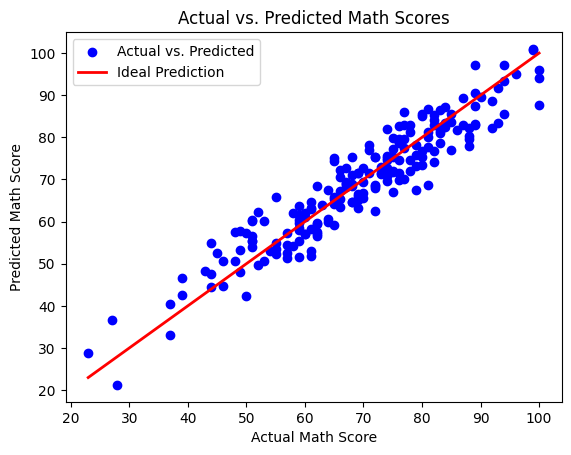

Mean Squared Error: 24.838558210542566
R-squared: 0.8874881345612097


In [16]:
#Plot the actual vs. predicted values:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

#single feature
feature = 'reading score'
X_single_train = X_train[feature].values.reshape(-1, 1)
X_single_test = X_test[feature].values.reshape(-1, 1)

lr_single = LinearRegression()
lr_single.fit(X_single_train, y_train)

y_pred_single = lr_single.predict(X_single_test)

# Add a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Prediction')

plt.legend()
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs. Predicted Math Scores")
plt.show()

#Metrices
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

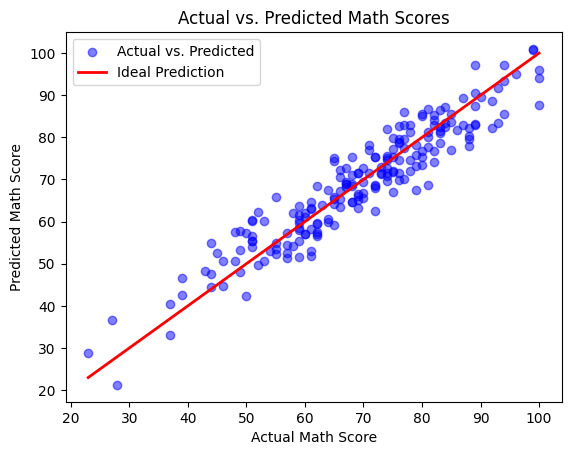

Mean Squared Error: 24.838558210542566
R-squared: 0.8874881345612097


In [17]:
#All the features multi linear regression
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

y_pred_multi = lr_multi.predict(X_test)

#plot
plt.scatter(y_test, y_pred_multi, color='blue', alpha = 0.5, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Prediction')
plt.legend()
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs. Predicted Math Scores")
plt.show()

#metrices
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"Mean Squared Error: {mse_multi}")
print(f"R-squared: {r2_multi}")